In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

In [3]:
data = pd.read_csv('BrentOilPrices.csv', index_col='Date')
data.head()

,Price
Date,
20-May-87,18.63
21-May-87,18.45
22-May-87,18.55
25-May-87,18.60
26-May-87,18.63


In [4]:
# from sklearn.preprocessing import MinMaxScaler
# values = data['Price'].values.reshape(-1,1)
# values = values.astype('float32')
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)
# train_size = int(len(scaled) * 0.7)
# test_size = len(scaled) - train_size
# train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
# print(len(train), len(test))

In [5]:
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
scaled = data['Price'].values
scaled = scaled.reshape(-1, 1)
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

5987 2567


In [6]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [7]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

5986
2566


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [9]:
X_train.shape

(5986, 1, 1)

# Base Model

In [10]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X_train, y_train, epochs=225, batch_size=100,
                    validation_data=(X_test, y_test), verbose=1, shuffle=False)

Epoch 1/225
60/60 [==============================] - 3s 12ms/step - loss: 31.3123 - val_loss: 69.4939
Epoch 2/225
60/60 [==============================] - 0s 6ms/step - loss: 25.2931 - val_loss: 61.6521
Epoch 3/225
60/60 [==============================] - 0s 6ms/step - loss: 18.9074 - val_loss: 55.9352
Epoch 4/225
60/60 [==============================] - 0s 5ms/step - loss: 15.3509 - val_loss: 52.6456
Epoch 5/225
60/60 [==============================] - 0s 6ms/step - loss: 15.0737 - val_loss: 51.5729
Epoch 6/225
60/60 [==============================] - 0s 6ms/step - loss: 13.9887 - val_loss: 49.7616
Epoch 7/225
60/60 [==============================] - 0s 6ms/step - loss: 13.3255 - val_loss: 48.0816
Epoch 8/225
60/60 [==============================] - 0s 6ms/step - loss: 13.1928 - val_loss: 46.7652
Epoch 9/225
60/60 [==============================] - 0s 5ms/step - loss: 12.7358 - val_loss: 45.3753
Epoch 10/225
60/60 [==============================] - 0s 6ms/step - loss: 12.3729 - val_lo

60/60 [==============================] - 0s 6ms/step - loss: 2.5882 - val_loss: 10.9936
Epoch 83/225
60/60 [==============================] - 0s 6ms/step - loss: 2.5753 - val_loss: 10.8673
Epoch 84/225
60/60 [==============================] - 0s 6ms/step - loss: 2.5565 - val_loss: 10.7120
Epoch 85/225
60/60 [==============================] - 0s 6ms/step - loss: 2.5685 - val_loss: 10.6091
Epoch 86/225
60/60 [==============================] - 0s 5ms/step - loss: 2.5687 - val_loss: 10.4649
Epoch 87/225
60/60 [==============================] - 0s 6ms/step - loss: 2.5676 - val_loss: 10.3456
Epoch 88/225
60/60 [==============================] - 0s 6ms/step - loss: 2.5956 - val_loss: 10.2169
Epoch 89/225
60/60 [==============================] - 0s 6ms/step - loss: 2.5826 - val_loss: 10.1188
Epoch 90/225
60/60 [==============================] - 0s 6ms/step - loss: 2.6226 - val_loss: 10.0148
Epoch 91/225
60/60 [==============================] - 0s 6ms/step - loss: 2.6518 - val_loss: 9.9139
Epoc

60/60 [==============================] - 0s 7ms/step - loss: 2.9547 - val_loss: 8.1104
Epoch 164/225
60/60 [==============================] - 0s 6ms/step - loss: 2.9596 - val_loss: 8.2463
Epoch 165/225
60/60 [==============================] - 0s 6ms/step - loss: 2.9973 - val_loss: 8.3184
Epoch 166/225
60/60 [==============================] - 0s 5ms/step - loss: 2.9906 - val_loss: 8.2545
Epoch 167/225
60/60 [==============================] - 0s 6ms/step - loss: 2.9483 - val_loss: 8.1883
Epoch 168/225
60/60 [==============================] - 0s 7ms/step - loss: 2.9500 - val_loss: 8.2459
Epoch 169/225
60/60 [==============================] - 0s 6ms/step - loss: 2.9604 - val_loss: 8.1928
Epoch 170/225
60/60 [==============================] - 0s 7ms/step - loss: 2.9446 - val_loss: 8.1942
Epoch 171/225
60/60 [==============================] - 0s 7ms/step - loss: 2.9431 - val_loss: 8.1814
Epoch 172/225
60/60 [==============================] - 0s 6ms/step - loss: 2.9367 - val_loss: 8.1785
Epoc

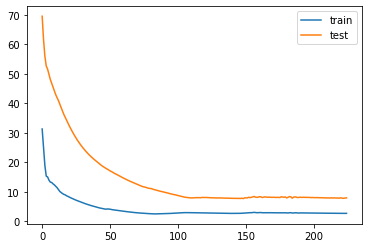

In [12]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

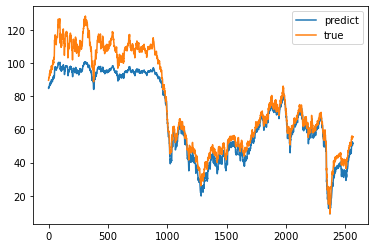

In [13]:
yhat = model.predict(X_test)
plt.plot(yhat, label='predict')
plt.plot(y_test, label='true')
plt.legend()
plt.show()

# CNN Model

In [14]:
data.copy()

,Price
Date,
20-May-87,18.63
21-May-87,18.45
22-May-87,18.55
25-May-87,18.60
26-May-87,18.63
...,...
"Jan 19, 2021",55.38
"Jan 20, 2021",55.66
"Jan 21, 2021",55.68


In [15]:
def create_dataset_CNN(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, :])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [16]:
X_train, y_train = create_dataset_CNN(train)
X_test, y_test = create_dataset_CNN(test)

5957
2537


In [17]:
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 128)           384       
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 128)           32896     
                                                                 
 conv1d_2 (Conv1D)           (None, 27, 128)           32896     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 13, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1664)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               166500    
                                                      

In [18]:
# fit model
history = model.fit(X_train, y_train, epochs=225,
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/225
60/60 [==============================] - 5s 34ms/step - loss: 68.6555 - val_loss: 24.3032
Epoch 2/225
60/60 [==============================] - 1s 20ms/step - loss: 10.9100 - val_loss: 23.7423
Epoch 3/225
60/60 [==============================] - 1s 23ms/step - loss: 9.4219 - val_loss: 16.5265
Epoch 4/225
60/60 [==============================] - 1s 25ms/step - loss: 7.1315 - val_loss: 13.6516
Epoch 5/225
60/60 [==============================] - 1s 24ms/step - loss: 5.9076 - val_loss: 11.0716
Epoch 6/225
60/60 [==============================] - 1s 25ms/step - loss: 5.5344 - val_loss: 10.1725
Epoch 7/225
60/60 [==============================] - 1s 23ms/step - loss: 5.0921 - val_loss: 9.4047 0s - loss: 5.15
Epoch 8/225
60/60 [==============================] - 1s 19ms/step - loss: 5.9868 - val_loss: 23.7732
Epoch 9/225
60/60 [==============================] - 1s 24ms/step - loss: 4.5303 - val_loss: 14.7374
Epoch 10/225
60/60 [==============================] - 1s 22ms/step - loss:

60/60 [==============================] - 1s 9ms/step - loss: 2.1636 - val_loss: 4.1529
Epoch 83/225
60/60 [==============================] - 1s 9ms/step - loss: 2.3472 - val_loss: 15.8170
Epoch 84/225
60/60 [==============================] - 1s 9ms/step - loss: 2.9731 - val_loss: 16.1145
Epoch 85/225
60/60 [==============================] - 1s 9ms/step - loss: 2.6033 - val_loss: 5.5836
Epoch 86/225
60/60 [==============================] - 1s 9ms/step - loss: 2.2754 - val_loss: 4.0865
Epoch 87/225
60/60 [==============================] - 1s 10ms/step - loss: 2.1870 - val_loss: 4.4462
Epoch 88/225
60/60 [==============================] - 1s 9ms/step - loss: 2.1075 - val_loss: 6.9502
Epoch 89/225
60/60 [==============================] - 1s 9ms/step - loss: 2.2042 - val_loss: 5.4554
Epoch 90/225
60/60 [==============================] - 1s 9ms/step - loss: 2.2951 - val_loss: 5.0210
Epoch 91/225
60/60 [==============================] - 1s 9ms/step - loss: 2.5426 - val_loss: 9.4235
Epoch 92/2

60/60 [==============================] - 1s 9ms/step - loss: 2.3245 - val_loss: 4.1752
Epoch 164/225
60/60 [==============================] - 1s 9ms/step - loss: 2.4287 - val_loss: 6.1626
Epoch 165/225
60/60 [==============================] - 1s 9ms/step - loss: 2.1139 - val_loss: 4.8566
Epoch 166/225
60/60 [==============================] - 1s 9ms/step - loss: 2.2244 - val_loss: 4.2764
Epoch 167/225
60/60 [==============================] - 1s 9ms/step - loss: 2.0559 - val_loss: 5.4926
Epoch 168/225
60/60 [==============================] - 1s 9ms/step - loss: 2.3677 - val_loss: 4.9603
Epoch 169/225
60/60 [==============================] - 1s 9ms/step - loss: 2.1799 - val_loss: 5.6030
Epoch 170/225
60/60 [==============================] - 1s 9ms/step - loss: 2.1754 - val_loss: 4.3430
Epoch 171/225
60/60 [==============================] - 1s 9ms/step - loss: 2.0857 - val_loss: 4.3496
Epoch 172/225
60/60 [==============================] - 1s 9ms/step - loss: 2.0642 - val_loss: 4.2136
Epoc

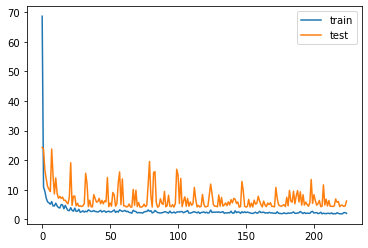

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

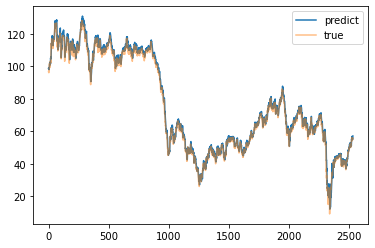

In [22]:
yhat = model.predict(X_test)
plt.plot(yhat, label='predict')
plt.plot(y_test, label='true',alpha=0.5)
plt.legend()
plt.show()